In [22]:
import uncertainties
from uncertainties.umath import * # sin(), etc.
from uncertainties import ufloat
from uncertainties import unumpy, umath
import math
import matplotlib.pyplot as plt
import math
import numpy as np
import glob



In [2]:
result_files = []
for i in range(1, 101):
    result_files.append(f"/dice/users/pc24403/BPGGSZ/sig_only_fit/b2dk_output_{i}.txt")

In [7]:

foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
xp = []
xm = []
yp = []
ym = []

for result_file in result_files:
    idx = 0
    idxs = []
    x = []
    dx = []
    cov = []
    with open(result_file) as f:
        for l in f:
            if "│ 0 │ x0 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx +=1
            if "│ 1 │ x1 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]                     
                idx += 1
            if "│ 2 │ x2 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx += 1
            if "│ 3 │ x3 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx += 1
            log_strings += [l.replace("\n", "")]

    xp.append(ufloat(x[0], dx[0]))
    xm.append(ufloat(x[2], dx[2]))
    yp.append(ufloat(x[1], dx[1]))
    ym.append(ufloat(x[3], dx[3]))

In [8]:
x_exp = [-0.0897, -0.0110, 0.0586, 0.0688, 0.0050, -0.000, -0.0037, -0.0034]

In [9]:
xp

[-0.089+/-0.008,
 -0.112+/-0.008,
 -0.103+/-0.008,
 -0.098+/-0.008,
 -0.103+/-0.007,
 -0.108+/-0.008,
 -0.091+/-0.008,
 -0.105+/-0.008,
 -0.105+/-0.006,
 -0.098+/-0.008,
 -0.081+/-0.008,
 -0.103+/-0.007,
 -0.101+/-0.008,
 -0.105+/-0.008,
 -0.095+/-0.007,
 -0.101+/-0.008,
 -0.099+/-0.008,
 -0.101+/-0.008,
 -0.096+/-0.008,
 -0.092+/-0.008,
 -0.118+/-0.008,
 -0.103+/-0.008,
 -0.095+/-0.008,
 -0.097+/-0.008,
 -0.104+/-0.008,
 -0.101+/-0.008,
 -0.097+/-0.008,
 -0.11+/-0.008,
 -0.097+/-0.009,
 -0.11+/-0.008,
 -0.103+/-0.008,
 -0.077+/-0.008,
 -0.096+/-0.008,
 -0.107+/-0.008,
 -0.102+/-0.008,
 -0.115+/-0.008,
 -0.106+/-0.008,
 -0.114+/-0.008,
 -0.088+/-0.008,
 -0.102+/-0.008,
 -0.094+/-0.008,
 -0.105+/-0.008,
 -0.109+/-0.008,
 -0.11+/-0.008,
 -0.106+/-0.008,
 -0.106+/-0.008,
 -0.114+/-0.008,
 -0.099+/-0.008,
 -0.094+/-0.007,
 -0.131+/-0.008,
 -0.1+/-0.008,
 -0.085+/-0.008,
 -0.099+/-0.007,
 -0.087+/-0.008,
 -0.115+/-0.008,
 -0.114+/-0.009,
 -0.093+/-0.008,
 -0.104+/-0.007,
 -0.111+/-0.008,
 -

In [10]:
xp[0]

-0.089+/-0.008

In [11]:
xp_pull = []
yp_pull = []
xm_pull = []
ym_pull = []

for i in range(len(xp)):
    xp_pull.append((xp[i].n-x_exp[0])/xp[i].s)
    yp_pull.append((yp[i].n-x_exp[1])/xp[i].s)
    xm_pull.append((xm[i].n-x_exp[2])/xp[i].s)
    ym_pull.append((ym[i].n-x_exp[3])/xp[i].s)


Text(0.5, 0.5, 'mean: -0.11\nstd: 1.2')

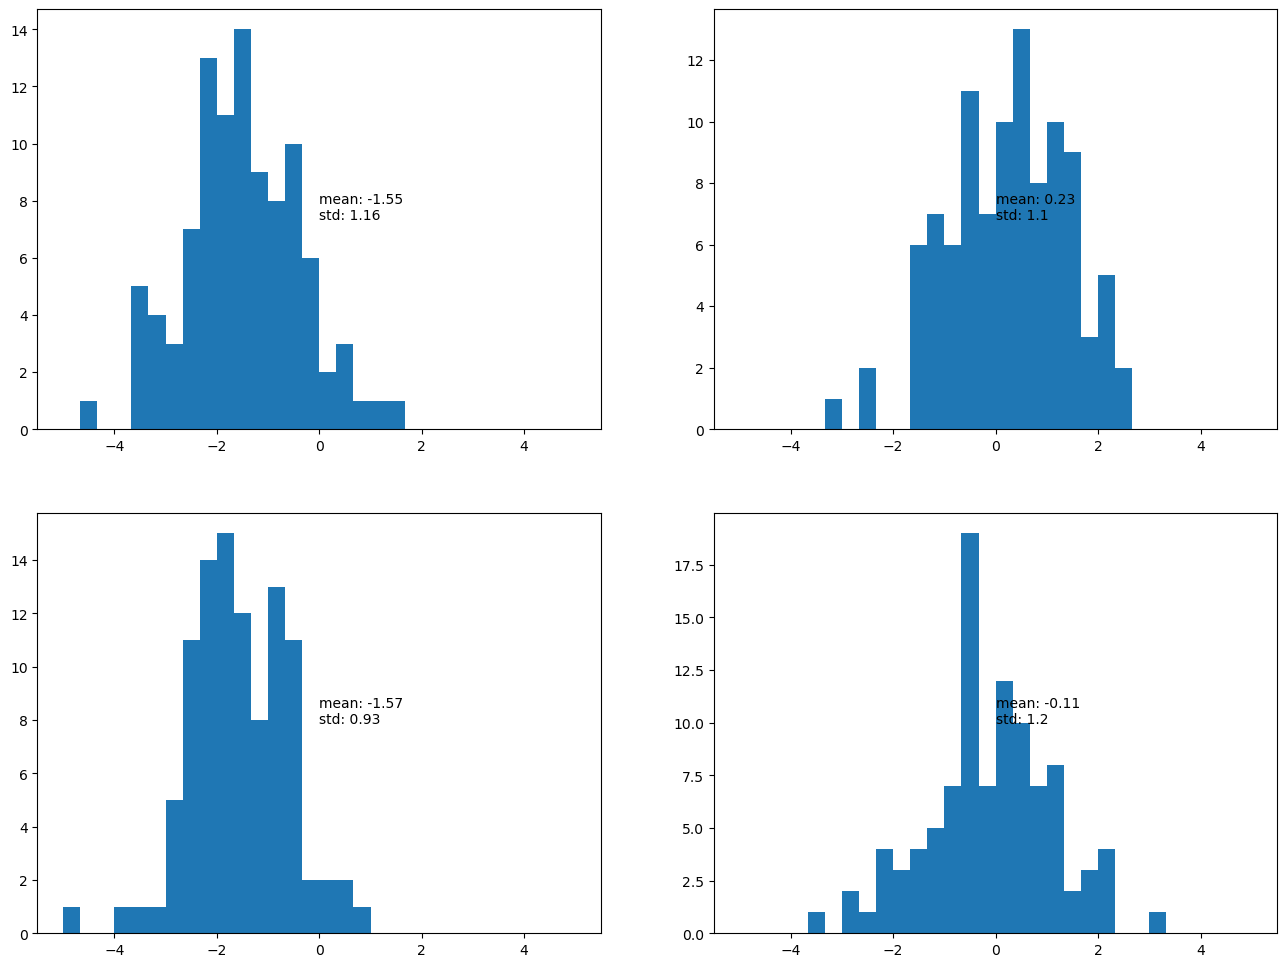

In [39]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8*2, 6*2))

ax1.hist(xp_pull, bins=30, range=(-5, 5))
ax1.text(0.5, 0.5, f"mean: {np.mean(xp_pull):.2f}\nstd: {np.std(xp_pull):.2f}", transform=ax1.transAxes)


ax2.hist(yp_pull, bins=30, range=(-5, 5))
ax2.text(0.5, 0.5, f"mean: {np.mean(yp_pull):.2f}\nstd: {np.std(yp_pull):.2}", transform=ax2.transAxes)

ax3.hist(xm_pull, bins=30, range=(-5, 5))
ax3.text(0.5, 0.5, f"mean: {np.mean(xm_pull):.2f}\nstd: {np.std(xm_pull):.2}", transform=ax3.transAxes)

ax4.hist(ym_pull, bins=30, range=(-5, 5))
ax4.text(0.5, 0.5, f"mean: {np.mean(ym_pull):.2f}\nstd: {np.std(ym_pull):.2}", transform=ax4.transAxes)

In [13]:
result_files = []
for i in range(1, 101):
    result_files.append(f"/dice/users/pc24403/BPGGSZ/sig_only_fit/b2dpi_output_{i}.txt")

foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
xp_dpi = []
xm_dpi = []
yp_dpi = []
ym_dpi = []

for result_file in result_files:
    idx = 0
    idxs = []
    x = []
    dx = []
    cov = []
    with open(result_file) as f:
        for l in f:
            if "│ 0 │ x0 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx +=1
            if "│ 1 │ x1 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]                     
                idx += 1
            if "│ 2 │ x2 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx += 1
            if "│ 3 │ x3 " in l:
                a = l.split()
                value = float(a[5])
                x += [value]
                error = float(a[7])
                dx += [error]
                idxs += [idx]
                idx += 1
            log_strings += [l.replace("\n", "")]

    xp_dpi.append(ufloat(x[0], dx[0]))
    xm_dpi.append(ufloat(x[2], dx[2]))
    yp_dpi.append(ufloat(x[1], dx[1]))
    ym_dpi.append(ufloat(x[3], dx[3]))

    #a=umath.degrees(0.5 * (umath.atan((-xp * ym + xm * yp)/(xp*xm + yp * ym)) + math.pi))

    #print("Result is {:.2u}".format(a))

#norm = a.n
#err = a.s

In [14]:
xp_dpi_pull = []
yp_dpi_pull = []
xm_dpi_pull = []
ym_dpi_pull = []

for i in range(len(xp)):
    xp_dpi_pull.append((xp_dpi[i].n-x_exp[4])/xp_dpi[i].s)
    yp_dpi_pull.append((yp_dpi[i].n-x_exp[5])/xp_dpi[i].s)
    xm_dpi_pull.append((xm_dpi[i].n-x_exp[6])/xp_dpi[i].s)
    ym_dpi_pull.append((ym_dpi[i].n-x_exp[7])/xp_dpi[i].s)


In [16]:
print(xp_dpi)

[-0.0097+/-0.0021, -0.0078+/-0.0021, -0.006+/-0.0021, -0.0094+/-0.0021, -0.0089+/-0.0021, -0.0066+/-0.0021, -0.008+/-0.0021, -0.0064+/-0.0021, -0.0054+/-0.0021, -0.0074+/-0.0021, -0.0077+/-0.0021, -0.0072+/-0.0021, -0.0131+/-0.0021, -0.0076+/-0.0021, -0.0098+/-0.0021, -0.0069+/-0.0021, -0.0059+/-0.0021, -0.0096+/-0.0021, -0.0073+/-0.0021, -0.0094+/-0.0021, -0.0089+/-0.0021, -0.0096+/-0.0021, -0.01+/-0.0021, -0.0087+/-0.0021, -0.0093+/-0.0021, -0.0094+/-0.0021, -0.0052+/-0.0021, -0.0081+/-0.0021, -0.008+/-0.0021, -0.009+/-0.0021, -0.0047+/-0.0021, -0.0086+/-0.0021, -0.0085+/-0.0021, -0.0076+/-0.0021, -0.0106+/-0.0021, -0.0085+/-0.0021, -0.0082+/-0.0021, -0.0055+/-0.0021, -0.009+/-0.0021, -0.0038+/-0.002, -0.006+/-0.0021, -0.0068+/-0.0021, -0.008+/-0.0021, -0.0076+/-0.0021, -0.0059+/-0.0021, -0.0092+/-0.0021, -0.0101+/-0.0021, -0.0078+/-0.0021, -0.0076+/-0.0021, -0.0073+/-0.0021, -0.0062+/-0.0021, -0.006+/-0.0021, -0.0077+/-0.0021, -0.0085+/-0.0021, -0.0029+/-0.0021, -0.0085+/-0.0021, -0

Text(0.7, 6.7, ' RMS: 1.36')

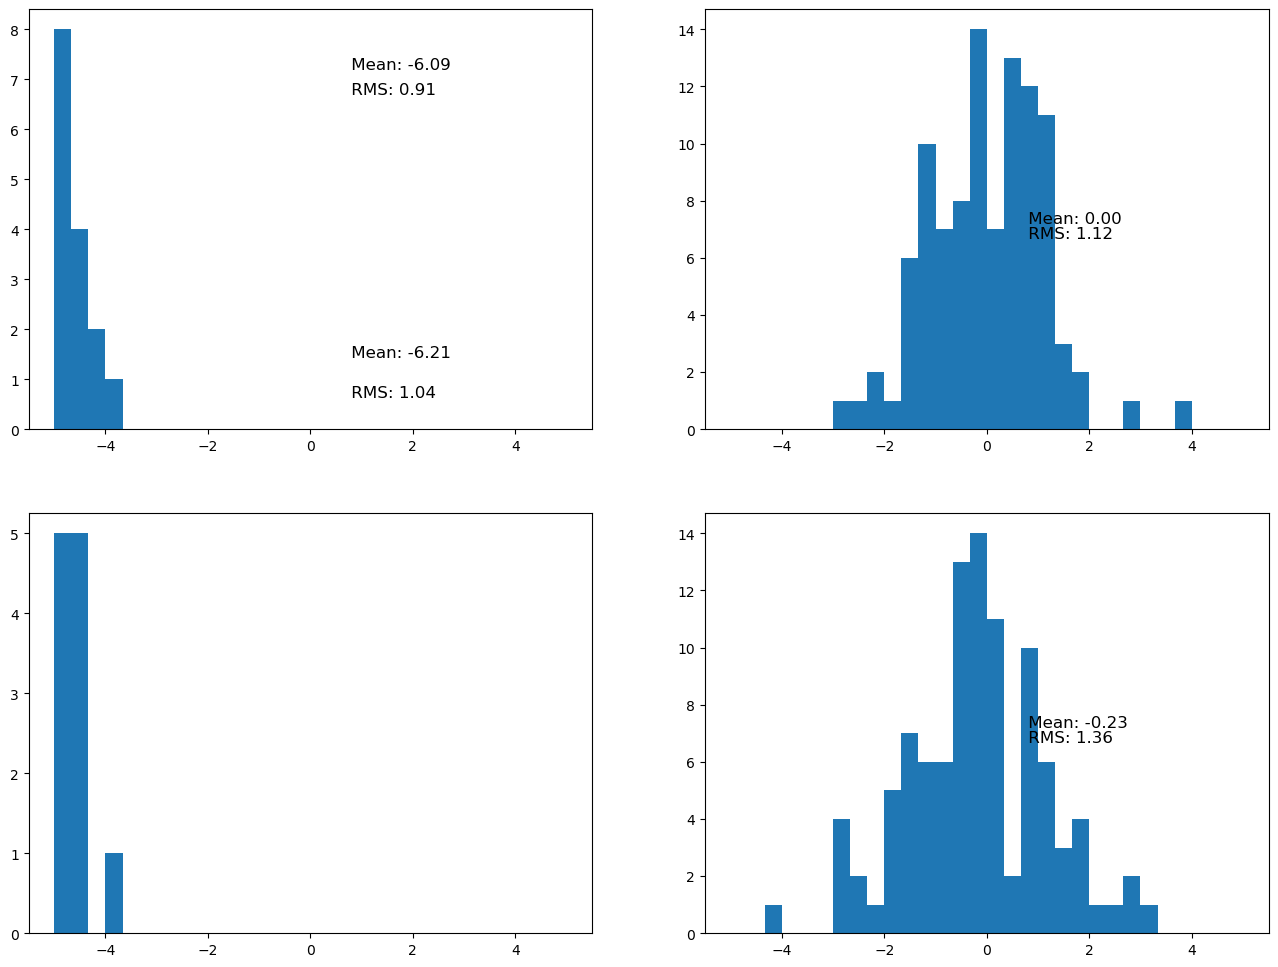

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8*2, 6*2))

ax1.hist(xp_dpi_pull, bins=30, range=(-5, 5))
ax1.text(0.7, 7.2, f" Mean: %.2f" % np.mean(xp_dpi_pull), fontsize=12)
ax1.text(0.7, 6.7, f" RMS: %.2f" % np.std(xp_dpi_pull), fontsize=12)

ax2.hist(yp_dpi_pull, bins=30, range=(-5, 5))
ax2.text(0.7, 7.2, f" Mean: %.2f" % np.mean(yp_dpi_pull), fontsize=12)
ax2.text(0.7, 6.7, f" RMS: %.2f" % np.std(yp_dpi_pull), fontsize=12)

ax3.hist(xm_dpi_pull, bins=30, range=(-5, 5))
ax3.text(0.7, 7.2, f" Mean: %.2f" % np.mean(xm_dpi_pull), fontsize=12)
ax3.text(0.7, 6.7, f" RMS: %.2f" % np.std(xm_dpi_pull), fontsize=12)

ax4.hist(ym_dpi_pull, bins=30, range=(-5, 5))
ax4.text(0.7, 7.2, f" Mean: %.2f" % np.mean(ym_dpi_pull), fontsize=12)
ax4.text(0.7, 6.7, f" RMS: %.2f" % np.std(ym_dpi_pull), fontsize=12)

In [14]:
idx = 0
idxs = []
x = []
dx = []
cov = []
foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
with open(result_file) as f:
    for l in f:
        if "│ 0 │ x0 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            error = float(a[7])
            dx += [error]
            idxs += [idx]
            idx +=1
        if "│ 1 │ x1 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            dx += [error]
            idxs += [idx]                     
            idx += 1
        if "│ 2 │ x2 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            dx += [error]
            idxs += [idx]
            idx += 1
        if "│ 3 │ x3 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            dx += [error]
            idxs += [idx]
            idx += 1
        log_strings += [l.replace("\n", "")]
xp = ufloat(x[0], dx[0])
xm = ufloat(x[2], dx[2])
yp = ufloat(x[1], dx[1])
ym = ufloat(x[3], dx[3])

a = umath.degrees(0.5 * (umath.atan((-xp * ym + xm * yp)/(xp*xm + yp * ym)) + math.pi))

print("Result is {:.2u}".format(a))

norm = a.n
err = a.s

Result is 59.6+/-3.5
